<a href="https://colab.research.google.com/github/Makushkin123/labs/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled32_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from IPython.display import SVG


In [ ]:
 import math as m

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from sklearn import tree

from sklearn.model_selection import cross_val_score

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline 

from IPython.display import SVG

from graphviz import Source


from IPython.display import display 

from IPython.display import HTML

style = "<style>svg{width:50% !important;height:30% !important;}</style>"

HTML(style)

In [ ]:
df_train = pd.read_csv("/content/gdrive/My Drive/вика/train_iris.csv", index_col=0)
df_test = pd.read_csv("/content/gdrive/My Drive/вика/test_iris.csv", index_col=0)

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [ ]:
X_train = df_train.drop(['species'], axis=1)
X_test = df_test.drop(['species'], axis=1)

In [ ]:
y_train = df_train.species
y_test = df_test.species

In [ ]:
rs = np.random.seed(0)

In [ ]:
score_data = pd.DataFrame()

In [ ]:
max_depth_values = range(1, 100)

In [ ]:
for max_depth in max_depth_values:
       clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
       clf.fit(X_train,y_train)
       train_score = clf.score(X_train,y_train)
       test_score = clf.score(X_test,y_test)
       mean_cross_val_score = cross_val_score(clf,X_train,y_train,cv = 5).mean()
       temp_score_data = pd.DataFrame({ 'max_depth' : [max_depth],
                                        'train_score' : [train_score],
                                        'test_score' : [test_score],
                                        'cross_val_score' : [mean_cross_val_score]})
       score_data = score_data.append(temp_score_data)

In [ ]:
score_data_long = pd.melt(score_data, id_vars = ['max_depth'],value_vars = ['train_score','test_score','cross_val_score'] ,var_name = 'set_type' , value_name = 'score')

In [ ]:
score_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
292,95,cross_val_score,0.96
293,96,cross_val_score,0.96
294,97,cross_val_score,0.96
295,98,cross_val_score,0.96


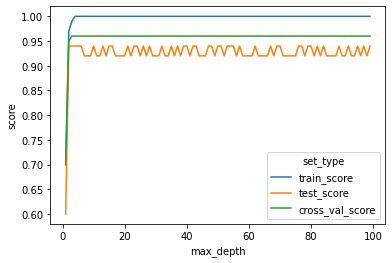

In [ ]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = score_data_long )